In [111]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [112]:
print ("tensorflow version: ", tf.__version__)
print ("numpy version: ", np.__version__)
print ("pandas version: ", pd.__version__)

tensorflow version:  2.16.2
numpy version:  1.26.4
pandas version:  2.2.2


In [113]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
norm_train_data = train_data / 255.0
norm_test_data = test_data / 255.0

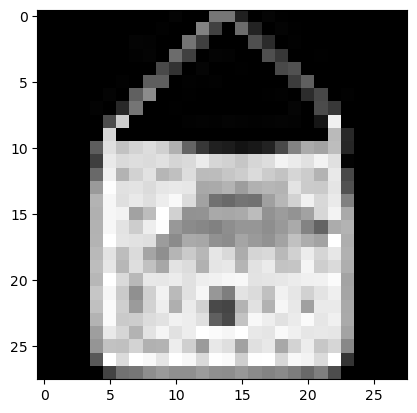

In [114]:
import random as rd
plt.imshow(train_data[rd.randint(0,len(train_data)-1)], cmap=plt.get_cmap('gray'))

In [123]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
history = model.fit(norm_train_data, train_labels, epochs=40, validation_data=(norm_test_data, test_labels),verbose=2,callbacks=[lr_schedule])

/Users/veerjyotsammi/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 - 11s - 6ms/step - accuracy: 0.7990 - loss: 0.5689 - val_accuracy: 0.8279 - val_loss: 0.4767 - learning_rate: 0.0010
Epoch 2/40
1875/1875 - 10s - 5ms/step - accuracy: 0.8547 - loss: 0.4056 - val_accuracy: 0.8472 - val_loss: 0.4235 - learning_rate: 0.0011
Epoch 3/40
1875/1875 - 10s - 5ms/step - accuracy: 0.8641 - loss: 0.3748 - val_accuracy: 0.8594 - val_loss: 0.3927 - learning_rate: 0.0013
Epoch 4/40
1875/1875 - 10s - 5ms/step - accuracy: 0.8702 - loss: 0.3570 - val_accuracy: 0.8672 - val_loss: 0.3794 - learning_rate: 0.0014
Epoch 5/40
1875/1875 - 10s - 6ms/step - accuracy: 0.8744 - loss: 0.3444 - val_accuracy: 0.8567 - val_loss: 0.3913 - learning_rate: 0.0016
Epoch 6/40
1875/1875 - 10s - 5ms/step - accuracy: 0.8748 - loss: 0.3401 - val_accuracy: 0.8591 - val_loss: 0.3945 - learning_rate: 0.0018
Epoch 7/40
1875/1875 - 10s - 5ms/step - accuracy: 0.8789 - loss: 0.3320 - val_accuracy: 0.8693 - val_loss: 0.3806 - learning_rate: 0.0020
Epoch 8/40
1875/1875 - 10s - 5ms/s

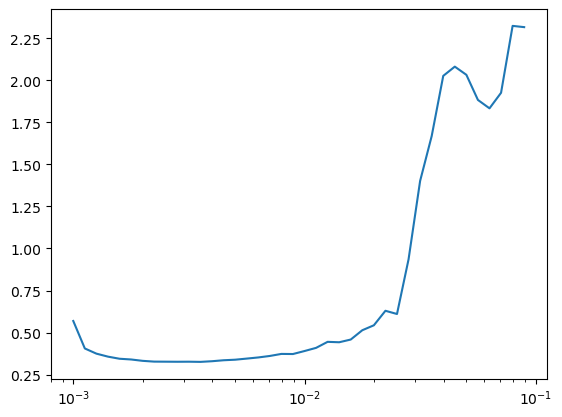

In [124]:
lr = 1e-3 * 10**(tf.range(40)/20) 
plt.semilogx(lr, history.history["loss"])

In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3 * 10**(9/20) ),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(norm_train_data, train_labels, epochs=100, validation_data=(norm_test_data, test_labels),verbose=2)

Epoch 1/100
1875/1875 - 11s - 6ms/step - accuracy: 0.8093 - loss: 0.5325 - val_accuracy: 0.8461 - val_loss: 0.4330
Epoch 2/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8529 - loss: 0.4058 - val_accuracy: 0.8466 - val_loss: 0.4307
Epoch 3/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8604 - loss: 0.3797 - val_accuracy: 0.8527 - val_loss: 0.4117
Epoch 4/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8663 - loss: 0.3634 - val_accuracy: 0.8428 - val_loss: 0.4149
Epoch 5/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8718 - loss: 0.3479 - val_accuracy: 0.8600 - val_loss: 0.3931
Epoch 6/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8757 - loss: 0.3380 - val_accuracy: 0.8614 - val_loss: 0.3825
Epoch 7/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8798 - loss: 0.3253 - val_accuracy: 0.8532 - val_loss: 0.3991
Epoch 8/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8817 - loss: 0.3212 - val_accuracy: 0.8704 - val_loss: 0.3738
Epoch 9/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8825 - loss: 0.3141 - val_a

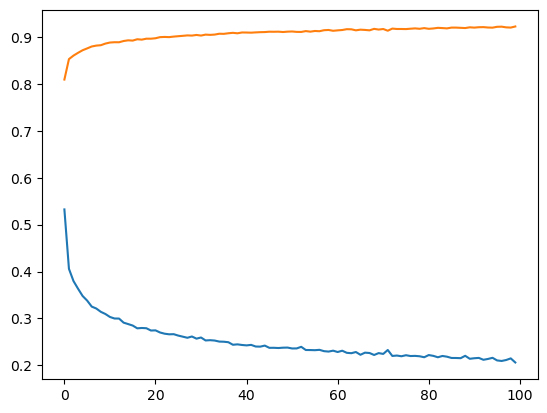

In [129]:
model.save("MultiClassClassification.keras")
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

In [130]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,162 (301.42 KB)

 Trainable params: 25,720 (100.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,442 (200.95 KB)

In [131]:
model.evaluate(norm_test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.5532


[0.5685662031173706, 0.8698999881744385]

In [132]:
y_pred = model.predict(norm_test_data).argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [133]:
confusion_matrix(test_labels,y_pred)

array([[852,   1,  15,  30,   5,   0,  88,   0,   9,   0],
       [  5, 962,   0,  26,   5,   0,   2,   0,   0,   0],
       [ 19,   0, 785,   7, 129,   1,  55,   0,   3,   1],
       [ 35,   7,  13, 819,  89,   3,  29,   0,   4,   1],
       [  1,   1,  79,  12, 861,   0,  40,   0,   6,   0],
       [  1,   0,   0,   0,   0, 952,   1,  23,   2,  21],
       [164,   1,  83,  21, 110,   0, 606,   0,  15,   0],
       [  0,   0,   0,   0,   0,  22,   0, 939,   0,  39],
       [  6,   2,   1,   4,   5,   1,   7,   5, 969,   0],
       [  0,   0,   0,   1,   0,   8,   1,  36,   0, 954]])